# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [3]:
import pandas as pd
import numpy as np
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [4]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000, na_values='Unknown')
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [5]:
print(len(df))
df.dtypes

30000


Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [6]:
#Each row is a dog licensed in NYC. "Primary Breed" is the type of dog and "Animal Birth" is its birth date

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [7]:
#1. How many dogs with expired licenses are in NYC?
#2. How many different dogs are in NYC?
#3. What is the most common breed of dog New Yorkers own?
#4. In what zip code is someone most likely to have a guard trained dog?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [8]:
df['Primary Breed'].value_counts().head(10)

Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: Primary Breed, dtype: int64

<AxesSubplot:>

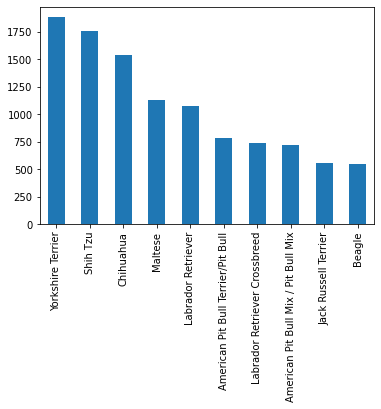

In [9]:
df['Primary Breed'].value_counts().head(10).plot.bar()

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<AxesSubplot:>

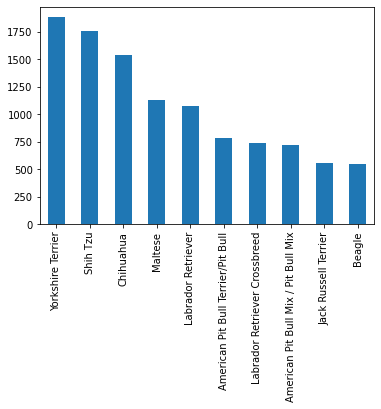

In [10]:
df.dropna(subset=['Primary Breed'])['Primary Breed'].value_counts().head(10).plot.bar()

## What are the most popular dog names?

In [11]:
df['Animal Name'].value_counts().head(10)

UNKNOWN    203
Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [12]:
df[df['Animal Name'] == 'Julia']

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
22947,11106,Julia,F,American Pit Bull Mix / Pit Bull Mix,NaN,Tan,NaN,NaN,2014-01-01,Yes,NaN,Yes,2015-07-26 13:11:14.917,2015-07-26,2016-07-26


In [13]:
len(df[df['Animal Name'] == 'Max'])

202

In [14]:
len(df[df['Animal Name'] == 'Maxwell'])

11

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [15]:
df['Guard or Trained'].value_counts(normalize=True)

No     0.999143
Yes    0.000857
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [16]:
df['Guard or Trained'].value_counts()

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [17]:
df['Guard or Trained'].value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: Guard or Trained, dtype: int64

In [18]:
19809+10174+17

30000

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [19]:
df['Guard or Trained'] = df['Guard or Trained'].replace(np.nan, 'No')

In [20]:
df['Guard or Trained'].value_counts()

No     29983
Yes       17
Name: Guard or Trained, dtype: int64

In [21]:
29983+17

30000

## What are the top dog breeds for guard dogs? 

In [22]:
df[df['Guard or Trained'] == 'Yes']['Primary Breed'].value_counts()

German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [23]:
df['Year'] = df['Animal Birth'].apply(lambda birth: birth.year)

In [24]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


In [25]:
# Since 'Animal Birth' is a datetime, we can do .dt.year
# And then we save it into a new column called 'birth_year'
# we can't do df.birth_year =  because it's a NEW COLUMN
# new columns always need df['...'] style
df['birth_year'] = df['Animal Birth'].dt.year
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,birth_year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [26]:
df['Age'] = 2021 - df['Year']

In [27]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,birth_year,Age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,2007,14
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,2013,8
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,2014,7
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,2008,13
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,2014,7


# Joining data together

In [28]:
neighborhoods = pd.read_csv('zipcodes-neighborhoods.csv')

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [29]:
neighborhoods = neighborhoods.rename(columns = {'zip':'Owner Zip Code'})

In [30]:
dogs = pd.merge(df, neighborhoods, on='Owner Zip Code', how='left')
#could also not rename and instead do: merged = df.merge(zipcodes_df, left_on='Owner Zip Code', right_on='zip')

In [31]:
len(dogs)

30000

In [32]:
dogs.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,birth_year,Age,neighborhood,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,2007,14,Upper West Side,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,2013,8,Southeast Bronx,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,2014,7,Greenwich Village and Soho,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,2008,13,Upper West Side,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,2014,7,Greenwich Village and Soho,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [33]:
#Bronx
dogs[dogs['borough'] == 'Bronx']['Animal Name'].value_counts().head(1)

Bella    22
Name: Animal Name, dtype: int64

In [34]:
#Brooklyn
dogs[dogs['borough'] == 'Brooklyn']['Animal Name'].value_counts().head(1)

Max    46
Name: Animal Name, dtype: int64

In [35]:
#UWS
dogs[dogs['neighborhood'] == 'Upper West Side']['Animal Name'].value_counts().head(1)

Lola    17
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [36]:
dogs.groupby('neighborhood')['Primary Breed'].value_counts().groupby(level=0, group_keys=False).nlargest(1)

neighborhood                   Primary Breed                       
Borough Park                   Yorkshire Terrier                        49
Bronx Park and Fordham         Yorkshire Terrier                        39
Bushwick and Williamsburg      Yorkshire Terrier                        47
Canarsie and Flatlands         Shih Tzu                                 56
Central Bronx                  Yorkshire Terrier                        29
Central Brooklyn               Shih Tzu                                 52
Central Harlem                 Chihuahua                                48
Central Queens                 Yorkshire Terrier                        34
Chelsea and Clinton            Chihuahua                                80
East Harlem                    Yorkshire Terrier                        44
East New York and New Lots     Yorkshire Terrier                        25
Flatbush                       Shih Tzu                                 38
Gramercy Park and Murray Hill  Y

In [37]:
# dataframe
# + groupby
# + grab a column
# + .value_counts()
# + .groupby(level=0, group_keys=False).nlargest(5)
merged.groupby(by='neighborhood')['Primary Breed'] \
    .value_counts() \
    .groupby(level=0, group_keys=False) \
    .nlargest(1)

NameError: name 'merged' is not defined

## What breed of dogs are the least likely to be spayed? Male or female?

In [38]:
dogs.groupby('Primary Breed')['Spayed or Neut'].value_counts(normalize=True).groupby(level=1, group_keys=False).nlargest(1).head(1)

Primary Breed  Spayed or Neut
Borzoi         No                1.0
Name: Spayed or Neut, dtype: float64

In [39]:
dogs.groupby('Animal Gender')['Spayed or Neut'].value_counts(normalize=True).groupby(level=1, group_keys=False).nlargest(2).head(2)

Animal Gender  Spayed or Neut
M              No                0.208144
F              No                0.142150
Name: Spayed or Neut, dtype: float64

In [40]:
pd.crosstab(dogs['Primary Breed'], dogs['Spayed or Neut'])

Spayed or Neut,No,Yes
Primary Breed,,
Affenpinscher,3,2
Afghan Hound,1,4
Airedale Terrier,2,6
Akita,7,30
Akita Crossbreed,3,14
Alaskan Malamute,3,9
American Bully,22,12
American English Coonhound,0,2
American Eskimo dog,10,62


In [42]:
df.pivot_table(values='Age',
               index='Primary Breed',
               columns='Spayed or Neut',
               aggfunc=['median', 'sum'])

median           sum         
Spayed or Neut                           No   Yes      No      Yes
Primary Breed                                                     
Affenpinscher                           8.0  11.5    34.0     23.0
Afghan Hound                            7.0  13.5     7.0     51.0
Airedale Terrier                        8.0  12.5    16.0     71.0
Akita                                  10.0  14.0    77.0    419.0
Akita Crossbreed                        8.0  10.0    23.0    159.0
Alaskan Malamute                        6.0  10.0    18.0     91.0
American Bully                          7.0   8.0   161.0    101.0
American English Coonhound              NaN  11.5     NaN     23.0
American Eskimo dog                     8.5  12.0   117.0    774.0
American Foxhound                       NaN  11.5     NaN     63.0
American Pit Bull Mix / Pit Bull Mix    7.0   9.0   745.0   6371.0
American Pit Bull Terrier/Pit Bull      8.0   9.0  1649.0   6141.0
American Staffordshire Terrier         10.0  10.0   193.0   1849.0
Anatolian Shepherd Dog                  NaN   7.0     NaN     44.0
Australian Cattle Dog                   6.5   8.0    13.0    179.0
Australian Cattledog                    7.5  10.0    31.0    759.0
Australian Kelpie                       NaN  10.0     NaN     98.0
Australian Shepherd                     6.0  10.0   255.0   1733.0
Australian Silky Terrier               14.0  12.0    14.0    129.0
Australian Terrier                      NaN  10.0     NaN     32.0
Basenji                                10.0  11.0    53.0    375.0
Basset Hound                            6.0   8.0     6.0    182.0
Bassett Hound                          13.0  12.0    13.0    692.0
Beagle                                  7.0  12.0   659.0   5881.0
Beagle Crossbreed                       6.0  10.0    95.0   2375.0
Bearded Collie                         13.0  10.0    13.0     42.0
Bedlington Terrier                      7.0  10.0    14.0     80.0
Belgian Griffon                         NaN  12.0     NaN     24.0
Belgian Malinois                        8.0  10.0    77.0    222.0
Belgian Sheepdog                       11.0  17.0    11.0     59.0
Belgian Tervuren                        NaN   7.5     NaN     15.0
Bernese Mountain Dog                    7.0  10.0    57.0    369.0
Bichon Frise                            9.0  14.0   573.0   3477.0
Biewer Terrier                          6.0  13.0     6.0     13.0
Black and Tan Coonhound                 NaN   7.0     NaN     54.0
Bloodhound                             13.0   8.0    36.0     64.0
Bluetick Coonhound                      NaN   8.0     NaN     41.0
Boerboel                                NaN  10.0     NaN     20.0
Border Collie                           6.5   9.0    59.0    787.0
Border Terrier                          7.0  10.0    48.0    663.0
Borzoi                                  7.0   NaN     7.0      NaN
Boston Terrier                          6.0  12.0   581.0   3194.0
Bouvier Des Flandres                    NaN  10.0     NaN     59.0
Boxer                                   9.0  11.0   408.0   2584.0
Briard                                  7.0  13.0     7.0     88.0
Brittany                                6.0   7.0     6.0     23.0
Brittany Spaniel                        8.0  12.0    54.0    395.0
Brussels Griffon                        8.0  12.0    84.0    862.0
Bull Dog, English                       7.0  11.0   632.0   2044.0
Bull Dog, French                        9.0  10.0   338.0   2746.0
Bull Terrier                            9.0  11.0   164.0    422.0
Bulldog                                 6.5   8.0   112.0    263.0
Bullmastiff                             6.0   9.0    20.0     45.0
Cairn Terrier                          14.0  13.0   119.0   1717.0
Canaan Dog                             16.0   NaN    16.0      NaN
Cane Corso                              8.0  10.0   171.0    232.0
Cardigan Welsh Corgi                    6.0   7.0    12.0     14.0
Catahoula Leopard

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [ ]:
dogs['Animal Dominant Color'] = dogs['Animal Dominant Color'].str.lower()
dogs['Animal Secondary Color'] = dogs['Animal Secondary Color'].str.lower()
dogs['Animal Third Color'] = dogs['Animal Third Color'].str.lower()
colors = ['black', 'white', 'grey', 'gray', np.nan]
dogs['monochrome'] = (dogs['Animal Dominant Color'].isin(colors) & dogs['Animal Secondary Color'].isin(colors) \
& dogs['Animal Third Color'].isin(colors))

In [ ]:
dogs[dogs.monochrome == True]

## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot:>

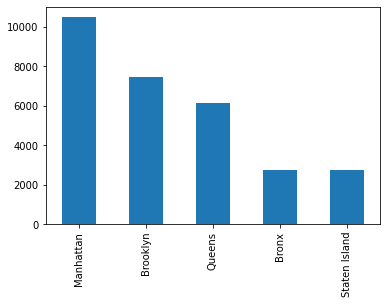

In [43]:
dogs['borough'].value_counts().plot.bar()

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [45]:
population = pd.read_csv('boro_population.csv')
population.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [46]:
dogs_pop = pd.merge(dogs, population, on='borough', how='left')
len(dogs_pop)

30000

In [47]:
dogs_pop.groupby('borough').population.value_counts()
    

borough        population
Bronx          1455444.0      2748
Brooklyn       2636735.0      7466
Manhattan      1644518.0     10478
Queens         2339150.0      6154
Staten Island  474558.0       2727
Name: population, dtype: int64

In [48]:
counts = {
    'Bronx': dogs_pop.borough.value_counts()[0],
    'Brooklyn': dogs_pop.borough.value_counts()[1],
    'Manhattan': dogs_pop.borough.value_counts()[2],
    'Queens': dogs_pop.borough.value_counts()[3],
    'Staten Island': dogs_pop.borough.value_counts()[4]
}

In [49]:
percapita = {}
for key, value in counts.items():
    boro_pop = population[population['borough'] == key]['population'].max()
    percapita[key] = (value / boro_pop) * 10000
percapita

{'Bronx': 71.99177707970901,
 'Brooklyn': 28.315321790016817,
 'Manhattan': 37.42129912837682,
 'Queens': 11.74785712758908,
 'Staten Island': 57.46399807821173}

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

<AxesSubplot:xlabel='borough,Primary Breed'>

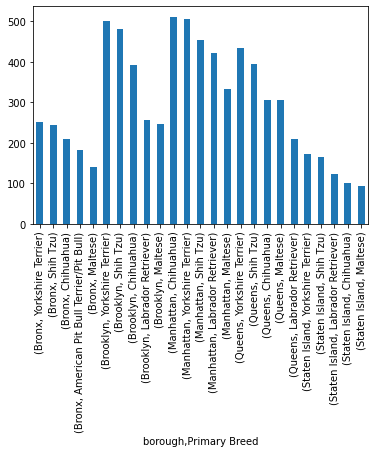

In [50]:
dogs_pop.groupby('borough')['Primary Breed'].value_counts().groupby(level=0, group_keys=False).nlargest(5).plot.bar()

## What percentage of dogs are not guard dogs?

In [ ]:
df['Guard or Trained'].value_counts(normalize=True).head(1)